In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path = "Top Global Paint Brands Comparison.xlsx"
df = pd.read_excel(file_path)

In [7]:
df.columns = ['Brand', 'AdSpend', 'Storefronts', 'Countries', 'Years']

In [8]:
df_clean = df.dropna()

In [9]:
print("Cleaned dataset shape:", df_clean.shape)

Cleaned dataset shape: (150, 5)


In [10]:
ad_spend = df_clean['AdSpend'].values
print("NumPy Analysis:")
print("Mean Ad Spend:", np.mean(ad_spend))
print("Median Ad Spend:", np.median(ad_spend))
print("Standard Deviation:", np.std(ad_spend))
print("Minimum Ad Spend:", np.min(ad_spend))
print("Maximum Ad Spend:", np.max(ad_spend))

NumPy Analysis:
Mean Ad Spend: 45992160.47333334
Median Ad Spend: 40638951.5
Standard Deviation: 29440192.46321004
Minimum Ad Spend: 765558
Maximum Ad Spend: 99086573


In [11]:
corr, pval = stats.pearsonr(df_clean['AdSpend'], df_clean['Storefronts'])
print(f"Pearson Correlation between AdSpend and Storefronts: {corr:.3f} (p-value: {pval:.3f})")

Pearson Correlation between AdSpend and Storefronts: -0.093 (p-value: 0.260)


In [13]:
X = sm.add_constant(df_clean['AdSpend'])
y = df_clean['Storefronts']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Storefronts   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.279
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.260
Time:                        10:32:55   Log-Likelihood:                -1297.9
No. Observations:                 150   AIC:                             2600.
Df Residuals:                     148   BIC:                             2606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2757.4267    211.252     13.053      0.0

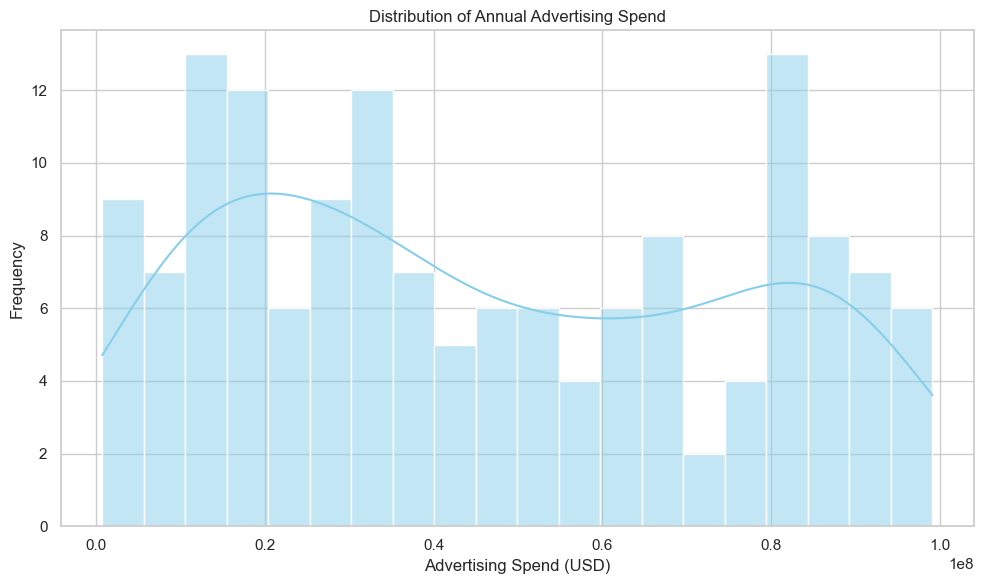

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['AdSpend'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Annual Advertising Spend")
plt.xlabel("Advertising Spend (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

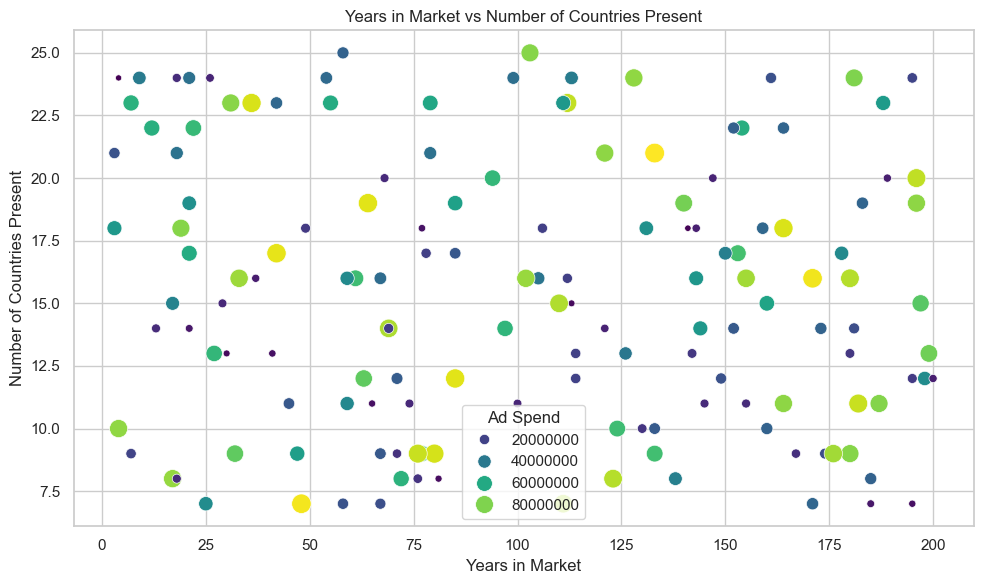

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Years', y='Countries', hue='AdSpend', palette='viridis', size='AdSpend', sizes=(20, 200))
plt.title("Years in Market vs Number of Countries Present")
plt.xlabel("Years in Market")
plt.ylabel("Number of Countries Present")
plt.legend(title="Ad Spend")
plt.tight_layout()
plt.show()

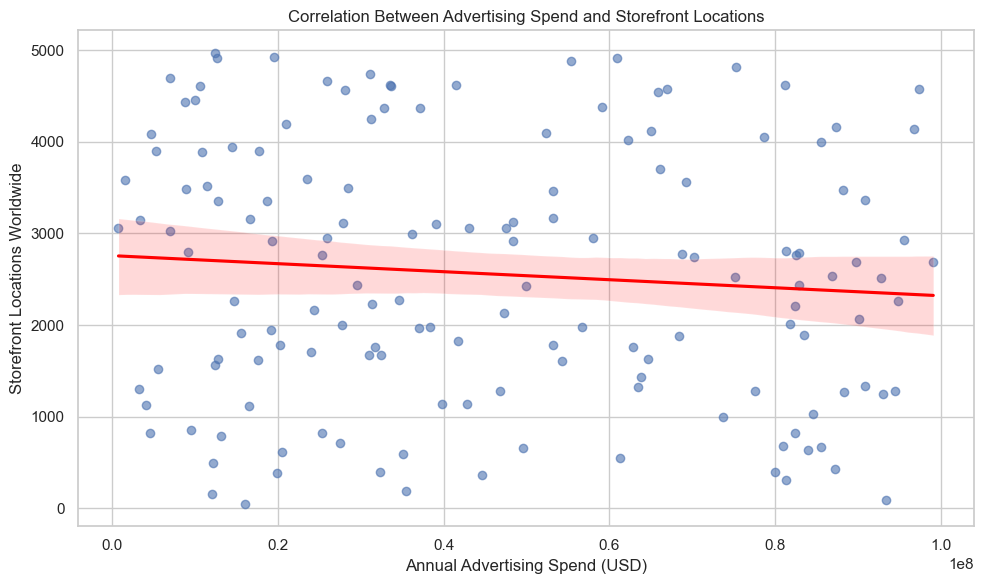

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='AdSpend', y='Storefronts', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Correlation Between Advertising Spend and Storefront Locations")
plt.xlabel("Annual Advertising Spend (USD)")
plt.ylabel("Storefront Locations Worldwide")
plt.tight_layout()
plt.show()